# Human Development Index

In [2388]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from urllib.request import urlopen
import pycountry
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Create a function to webscrape data 

I will need to call this function a few times as I want to bring in other data to use in my analysis of the Human Development Index. 

In [2264]:
url = 'https://en.m.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index'

In [2265]:
def webscraper(x):
    """Function scrapes data from wikipedia by identifying 'table' tags and then looping through each column in the
    table and returing the data as a pandas dataframe"""
    
    html = urlopen(x)
    soup = BeautifulSoup(html, 'html.parser')
    tables = soup.find_all('body')
    table1 = soup.find_all('table', attrs = {'class': 'wikitable'})
    #print("Number of tables on site: ",len(tabl))
    tab1 = table1[0]
    body = tab1.find_all("tr")
    head = body[0]
    body_rows = body[1:]
    
    headings = []
    for item in head.find_all("th"):
        item = (item.text).rstrip("\n")
        headings.append(item)
    print(f'Column Headers: {headings}')
    
    all_rows = [] # will be a list for list for all rows
    for row_num in range(len(body_rows)): # A row at a time
        row = [] # this will old entries for one row
        for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
            aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
            row.append(aa)
        all_rows.append(row)# append one row to all_rows
    
    country_data = []
    for i in all_rows:
        if len(i) > 1:
            country_data.append(i)
    
    return pd.DataFrame(country_data)

In [2266]:
webscraper(url)

Column Headers: ['Rank', 'Nation', 'HDI']


,0,1,2,3
0,1,,0.957,0.20%
1,2,(7),0.955,0.65%
2,2,,0.955,0.16%
3,4,(7),0.949,0.54%
4,4,(4),0.949,0.62%
...,...,...,...,...
184,185,(5),0.433,0.58%
185,185,(3),0.433,0.61%
186,187,(1),0.398,0.84%
187,188,(1),0.397,0.94%


In [2270]:
df = webscraper(url)

Column Headers: ['Rank', 'Nation', 'HDI']


In [2271]:
df.head()

,0,1,2,3
0,1,,0.957,0.20%
1,2,(7),0.955,0.65%
2,2,,0.955,0.16%
3,4,(7),0.949,0.54%
4,4,(4),0.949,0.62%


In [2272]:
project_href = [i['href'] for i in soup.find_all('a', href=True) if i['href'] != "#"]

nations = []
for i in project_href[85:276]:
    for j in i.split('/')[-1:]:
        nations.append(j)
print(nations)

['#cite_note-2020_components-2', '#cite_note-2020_trends-18', 'Norway', 'Republic_of_Ireland', 'Switzerland', 'Hong_Kong', 'Iceland', 'Germany', 'Sweden', 'Australia', 'Netherlands', 'Denmark', 'Finland', 'Singapore', 'United_Kingdom', 'Belgium', 'New_Zealand', 'Canada', 'United_States', 'Austria', 'Israel', 'Japan', 'Liechtenstein', 'Slovenia', 'Luxembourg', 'South_Korea', 'Spain', 'France', 'Czech_Republic', 'Malta', 'Estonia', 'Italy', 'United_Arab_Emirates', 'Greece', 'Cyprus', 'Lithuania', 'Poland', 'Andorra', 'Latvia', 'Portugal', 'Slovakia', 'Hungary', 'Saudi_Arabia', 'Bahrain', 'Chile', 'Croatia', 'Qatar', 'Argentina', 'Brunei', 'Montenegro', 'Romania', 'Palau', 'Kazakhstan', 'Russia', 'Belarus', 'Turkey', 'Uruguay', 'Bulgaria', 'Panama', 'The_Bahamas', 'Barbados', 'Oman', 'Georgia_(country)', 'Costa_Rica', 'Malaysia', 'Kuwait', 'Serbia', 'Mauritius', 'Seychelles', 'Trinidad_and_Tobago', 'Albania', 'Cuba', 'Iran', 'Sri_Lanka', 'Bosnia_and_Herzegovina', 'Grenada', 'Mexico', 'Sai

In [2273]:
def txt_cleaner(x):
    n = []
    for i in x:
        if "#" not in i:
            n.append(''.join([j if j != "_" else ' ' for j in i]))
    return n

In [2274]:
txt_cleaner(nations)

['Norway',
 'Republic of Ireland',
 'Switzerland',
 'Hong Kong',
 'Iceland',
 'Germany',
 'Sweden',
 'Australia',
 'Netherlands',
 'Denmark',
 'Finland',
 'Singapore',
 'United Kingdom',
 'Belgium',
 'New Zealand',
 'Canada',
 'United States',
 'Austria',
 'Israel',
 'Japan',
 'Liechtenstein',
 'Slovenia',
 'Luxembourg',
 'South Korea',
 'Spain',
 'France',
 'Czech Republic',
 'Malta',
 'Estonia',
 'Italy',
 'United Arab Emirates',
 'Greece',
 'Cyprus',
 'Lithuania',
 'Poland',
 'Andorra',
 'Latvia',
 'Portugal',
 'Slovakia',
 'Hungary',
 'Saudi Arabia',
 'Bahrain',
 'Chile',
 'Croatia',
 'Qatar',
 'Argentina',
 'Brunei',
 'Montenegro',
 'Romania',
 'Palau',
 'Kazakhstan',
 'Russia',
 'Belarus',
 'Turkey',
 'Uruguay',
 'Bulgaria',
 'Panama',
 'The Bahamas',
 'Barbados',
 'Oman',
 'Georgia (country)',
 'Costa Rica',
 'Malaysia',
 'Kuwait',
 'Serbia',
 'Mauritius',
 'Seychelles',
 'Trinidad and Tobago',
 'Albania',
 'Cuba',
 'Iran',
 'Sri Lanka',
 'Bosnia and Herzegovina',
 'Grenada',
 '

In [2275]:
nation = txt_cleaner(nations)

In [2276]:
#verify all data from column nation had been collected
len(nation)

187

In [2277]:
country = pd.DataFrame(nation)

In [2278]:
data_frame = pd.merge(country,df,left_index = True, right_index = True)

In [2279]:
country.rename(columns = {0:"Country"})

,Country
0,Norway
1,Republic of Ireland
2,Switzerland
3,Hong Kong
4,Iceland
...,...
182,Sierra Leone
183,Mali
184,Burundi
185,South Sudan


In [2280]:
data_frame.head(3)

,0_x,0_y,1,2,3
0,Norway,1,,0.957,0.20%
1,Republic of Ireland,2,(7),0.955,0.65%
2,Switzerland,2,,0.955,0.16%


In [2281]:
del data_frame['0_y']

In [2282]:
#data_frame.columns = ['Country', 'HDI Change (5 yrs)', 'HDI (2020 Report)', 'Avg. annual growth (%)']

In [2283]:
data_frame.isnull().sum()

0_x    0
1      0
2      0
3      0
dtype: int64

In [2284]:
data_frame.columns

Index(['0_x', 1, 2, 3], dtype='object')

In [2285]:
data_frame.rename(columns = {'0_x':'Country', 1: 'HDI Change (5 yrs)', 2:'HDI (2020 Report)', 3:'Avg. Annual Growth'},
                  inplace = True)

In [2286]:
data_frame.head()

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth
0,Norway,,0.957,0.20%
1,Republic of Ireland,(7),0.955,0.65%
2,Switzerland,,0.955,0.16%
3,Hong Kong,(7),0.949,0.54%
4,Iceland,(4),0.949,0.62%


In [2287]:
data_frame['Country'][134] = "Sao Tome and Principe"

In [2288]:
data_frame['Country'][134]

'Sao Tome and Principe'

In [2290]:
data_frame.head()

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth
0,Norway,,0.957,0.20%
1,Republic of Ireland,(7),0.955,0.65%
2,Switzerland,,0.955,0.16%
3,Hong Kong,(7),0.949,0.54%
4,Iceland,(4),0.949,0.62%


In [2291]:
data_frame.isnull().sum()

Country               0
HDI Change (5 yrs)    0
HDI (2020 Report)     0
Avg. Annual Growth    0
dtype: int64

In [2292]:
data_frame.dtypes

Country               object
HDI Change (5 yrs)    object
HDI (2020 Report)     object
Avg. Annual Growth    object
dtype: object

In [2293]:
data_frame.columns

Index(['Country', 'HDI Change (5 yrs)', 'HDI (2020 Report)',
       'Avg. Annual Growth'],
      dtype='object')

In [2294]:
data_frame['Avg. Annual Growth'] = data_frame['Avg. Annual Growth'].apply(lambda x: x[:-1])

In [2295]:
n = []
for i in data_frame['Avg. Annual Growth']:
    if i == 'NA[a':
        n.append(0)
    else:
        n.append(i)

In [2296]:
data_frame['Avg. Annual Growth'] = n

In [2297]:
data_frame['Avg. Annual Growth'] = data_frame['Avg. Annual Growth'].str.strip().astype(float)

In [2298]:
data_frame["HDI Change (5 yrs)"] = data_frame["HDI Change (5 yrs)"].apply(lambda x: x[2] if len(x) > 0 else x)

In [2299]:
data_frame['HDI (2020 Report)'] = data_frame['HDI (2020 Report)'].astype(float)

In [2300]:
data_frame['HDI (2020 Report)'] = data_frame['HDI (2020 Report)'] * 100

In [2301]:
data_frame.dtypes

Country                object
HDI Change (5 yrs)     object
HDI (2020 Report)     float64
Avg. Annual Growth    float64
dtype: object

In [2387]:
data_frame[data_frame['Avg. Annual Growth'] < 0]

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth
91,Lebanon,6,74.4,-0.32
101,Jordan,3,72.9,-0.12
104,Libya,4,72.4,-1.08
112,Venezuela,4,71.1,-0.69
140,East Timor,1,60.6,-0.40
151,Syria,2,56.7,-1.87
178,Yemen,1,47.0,-0.82


In [2302]:
data_frame.head()

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth
0,Norway,,95.7,0.20
1,Republic of Ireland,7,95.5,0.65
2,Switzerland,,95.5,0.16
3,Hong Kong,7,94.9,0.54
4,Iceland,4,94.9,0.62


### Scrape UN Sub-Region Data for more granular view of data

### Modified original function to webscrape to include column headers with DataFrame

In [2310]:
def webscraper1doto(x):
    html = urlopen(x)
    soup = BeautifulSoup(html, 'html.parser')
    tables = soup.find_all('body')
    table1 = soup.find_all('table', attrs = {'class': 'wikitable'})
    tab1 = table1[0]
    body = tab1.find_all("tr")
    head = body[0]
    body_rows = body[1:]
    headings = []
    for item in head.find_all("th"):
        item = (item.text).rstrip("\n")
        headings.append(item)
    all_rows = [] 
    for row_num in range(len(body_rows)): 
        row = [] 
        for row_item in body_rows[row_num].find_all("td"): 
            aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
            row.append(aa)
        all_rows.append(row)
    country_data = []
    for i in all_rows:
        if len(i) > 1:
            country_data.append(i)
    
    return pd.DataFrame(country_data, columns = headings)

In [2311]:
webscraper1doto(url_ungs)

,Country or Area,Sub-Subregion,Subregion,Region,UNSD M49 Codes
0,Algeria,,Northern Africa,Africa,012 < 015 < 002 < 001
1,Egypt,,Northern Africa,Africa,818 < 015 < 002 < 001
2,Libya,,Northern Africa,Africa,434 < 015 < 002 < 001
3,Morocco,,Northern Africa,Africa,504 < 015 < 002 < 001
4,Sudan,,Northern Africa,Africa,729 < 015 < 002 < 001
...,...,...,...,...,...
244,Samoa,,Polynesia,Oceania,882 < 061 < 009 < 001
245,Tokelau,,Polynesia,Oceania,772 < 061 < 009 < 001
246,Tonga,,Polynesia,Oceania,776 < 061 < 009 < 001
247,Tuvalu,,Polynesia,Oceania,798 < 061 < 009 < 001


In [2312]:
df1 = webscraper1doto(url_ungs)

In [2313]:
df1.head()

,Country or Area,Sub-Subregion,Subregion,Region,UNSD M49 Codes
0,Algeria,,Northern Africa,Africa,012 < 015 < 002 < 001
1,Egypt,,Northern Africa,Africa,818 < 015 < 002 < 001
2,Libya,,Northern Africa,Africa,434 < 015 < 002 < 001
3,Morocco,,Northern Africa,Africa,504 < 015 < 002 < 001
4,Sudan,,Northern Africa,Africa,729 < 015 < 002 < 001


In [2314]:
df1.rename(columns = {"Country or Area":"Country"},inplace = True)

In [2315]:
df1

,Country,Sub-Subregion,Subregion,Region,UNSD M49 Codes
0,Algeria,,Northern Africa,Africa,012 < 015 < 002 < 001
1,Egypt,,Northern Africa,Africa,818 < 015 < 002 < 001
2,Libya,,Northern Africa,Africa,434 < 015 < 002 < 001
3,Morocco,,Northern Africa,Africa,504 < 015 < 002 < 001
4,Sudan,,Northern Africa,Africa,729 < 015 < 002 < 001
...,...,...,...,...,...
244,Samoa,,Polynesia,Oceania,882 < 061 < 009 < 001
245,Tokelau,,Polynesia,Oceania,772 < 061 < 009 < 001
246,Tonga,,Polynesia,Oceania,776 < 061 < 009 < 001
247,Tuvalu,,Polynesia,Oceania,798 < 061 < 009 < 001


In [2316]:
df1['Country'] = df1['Country'].apply(lambda x: x.strip())

In [2317]:
df = pd.merge(data_frame,df1, on = 'Country', how = 'left')

In [2318]:
#when data was scraped some of the values came in
df.fillna('', inplace=True)

In [2319]:
df.replace('', np.nan, inplace = True)

In [2320]:
df.drop(columns = {"UNSD M49 Codes"}, inplace = True)

In [2321]:
#Create dictionary of missing Subregions which will be mapped to the Countries who have nan as a value using .map()

missing_regions = {"Republic of Ireland": "Northern Europe",
                  "Hong Kong": "Eastern Asia",
                  "South Korea": "Eastern Asia",
                  "France": "Western Europe",
                  "Czech Republic": "Eastern Europe",
                  "The Bahamas": "Latin America and the Caribbean / North America",
                  "Georgia (country)": "Western Asia",
                  "State of Palestine": "Western Asia",
                  "Cape Verde": "Western Africa",
                  "Sao Tome and Principe":"Sub-Saharan Africa",
                  "Federated States of Micronesia":"Micronesia",
                  "Eswatini":"Sub-Saharan Africa",
                  "East Timor":"South-eastern Asia",
                  "Myanmar":"South-eastern Asia",
                  "Republic of the Congo":"Sub-Saharan Africa",
                  "Ivory Coast": "Sub-Saharan Africa",
                  "The Gambia": "Sub-Saharan Africa",
                  "Democratic Republic of the Congo": "Sub-Saharan Africa"
                  }

In [2322]:
df['Subregion'] = df['Subregion'].fillna(df.Country.map(missing_regions))

In [2323]:
df['Sub-Subregion'] = df['Subregion'].where(df['Sub-Subregion'].isna(),df['Sub-Subregion'])

In [2324]:
regions = {"Republic of Ireland": "Europe",
                  "Hong Kong": "Asia",
                  "South Korea": "Asia",
                  "France": "Europe",
                  "Czech Republic": "Europe",
                  "The Bahamas": "Americas",
                  "Georgia (country)": "Asia",
                  "State of Palestine": "Asia",
                  "Cape Verde": "Africa",
                  "Sao Tome and Principe":"Africa",
                  "Federated States of Micronesia":"Oceania",
                  "Eswatini":"Africa",
                  "East Timor":"Asia",
                  "Myanmar":"Asia",
                  "Republic of the Congo":"Africa",
                  "Ivory Coast": "Africa",
                  "The Gambia": "Africa",
                  "Democratic Republic of the Congo": "Africa"
                  }

In [2325]:
df['Region'] = df['Region'].fillna(df.Country.map(regions))

In [2326]:
#drop HDI chage 5yrs because on the website this data had an up or down arrow associated with the number representing
#if the change had been positive or negative. However, these symbols were not brought over when scraped from wikipedia
#making their values unknown, therefore we will drop the column. 

df.drop(columns = ('HDI Change (5 yrs)'), inplace = True)

In [2327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             187 non-null    object 
 1   HDI (2020 Report)   187 non-null    float64
 2   Avg. Annual Growth  186 non-null    float64
 3   Sub-Subregion       187 non-null    object 
 4   Subregion           187 non-null    object 
 5   Region              187 non-null    object 
dtypes: float64(2), object(4)
memory usage: 10.2+ KB


In [2328]:
df.describe()

,HDI (2020 Report),Avg. Annual Growth
count,187.000000,186.000000
mean,72.591979,0.608172
std,14.668666,0.489922
min,39.800000,-1.870000
25%,60.750000,0.350000
50%,74.200000,0.565000
75%,83.350000,0.870000
max,95.700000,2.030000


In [2329]:
df[df['Avg. Annual Growth'] < 0]

,Country,HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
91,Lebanon,74.4,-0.32,Western Asia,Western Asia,Asia
101,Jordan,72.9,-0.12,Western Asia,Western Asia,Asia
104,Libya,72.4,-1.08,Northern Africa,Northern Africa,Africa
112,Venezuela,71.1,-0.69,South America,Latin America and the Caribbean,Americas
140,East Timor,60.6,-0.40,South-eastern Asia,South-eastern Asia,Asia
151,Syria,56.7,-1.87,Western Asia,Western Asia,Asia
178,Yemen,47.0,-0.82,Western Asia,Western Asia,Asia


In [2330]:
df.sort_values('Avg. Annual Growth', ascending = False).head(10)

,Country,HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
137,Eswatini,61.1,2.03,Sub-Saharan Africa,Sub-Saharan Africa,Africa
149,Zimbabwe,57.1,1.90,Eastern Africa,Sub-Saharan Africa,Africa
181,Burkina Faso,45.2,1.83,Western Africa,Sub-Saharan Africa,Africa
165,Djibouti,52.4,1.61,Eastern Africa,Sub-Saharan Africa,Africa
172,Ethiopia,48.5,1.58,Eastern Africa,Sub-Saharan Africa,Africa
161,Ivory Coast,53.8,1.56,Sub-Saharan Africa,Sub-Saharan Africa,Africa
177,Guinea,47.7,1.53,Western Africa,Sub-Saharan Africa,Africa
164,Lesotho,52.7,1.52,Southern Africa,Sub-Saharan Africa,Africa
128,Bhutan,65.4,1.46,Southern Asia,Southern Asia,Asia
180,Mozambique,45.6,1.44,Eastern Africa,Sub-Saharan Africa,Africa


In [2331]:
df[df['Region'] == 'Africa']['HDI (2020 Report)'].groupby(df['Sub-Subregion']).mean().sort_values(ascending = False)

Sub-Subregion
Northern Africa       68.583333
Southern Africa       65.425000
Middle Africa         56.740000
Sub-Saharan Africa    55.400000
Eastern Africa        54.864706
Western Africa        51.600000
Name: HDI (2020 Report), dtype: float64

In [2332]:
#Breakdown by Subregion of Countries with the 50 Highest growth rates. In the top 50 highest growth rates Sub-Saharan
#Africa has 32 or roughly 62% of top 50. 
df.sort_values('Avg. Annual Growth', ascending = False).head(50).value_counts('Subregion',normalize = True)

Subregion
Sub-Saharan Africa                                 0.62
Southern Asia                                      0.12
South-eastern Asia                                 0.08
Western Asia                                       0.06
Northern Africa                                    0.04
Latin America and the Caribbean / North America    0.04
Southern Europe                                    0.02
Eastern Asia                                       0.02
dtype: float64

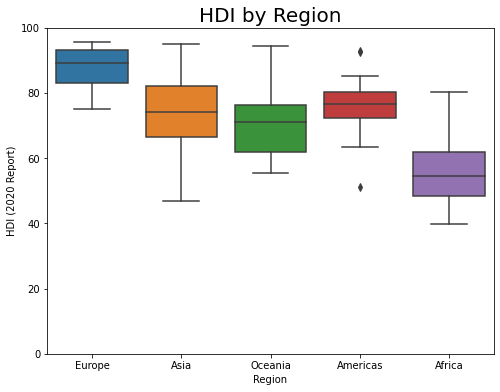

In [2333]:
var = 'Region'
data = pd.concat([df['HDI (2020 Report)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.title('HDI by Region', size = 20)
fig = sns.boxplot(x=var, y=df['HDI (2020 Report)'], data=data)
fig.axis(ymin=0, ymax=100);

### Explore Outliers From the Americas

In [2334]:
df[(df['Region'] == "Americas") & (df['HDI (2020 Report)'] > 90)]

,Country,HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
15,Canada,92.9,0.34,Northern America,North America,Americas
16,United States,92.6,0.12,Northern America,North America,Americas


In [2335]:
df[(df['Region'] == "Americas") & (df['HDI (2020 Report)'] < 60)]

,Country,HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
169,Haiti,51.0,0.89,Caribbean,Latin America and the Caribbean / North America,Americas


#### Asia appears to have the greatest range of HDI scores. Lets determine if Asia's range is greater than Africa's

In [2336]:
df[df['Region'] == 'Asia']['HDI (2020 Report)'].max() - df[df['Region'] == 'Asia']['HDI (2020 Report)'].min()

47.89999999999999

In [2337]:
df[df['Region'] == 'Africa']['HDI (2020 Report)'].max() - df[df['Region'] == 'Africa']['HDI (2020 Report)'].min()

40.6

In [2338]:
df[['Country', 'Region', 'HDI (2020 Report)']].head(25).value_counts('Region')

Region
Europe      16
Asia         5
Oceania      2
Americas     2
dtype: int64

### Average Annual Growth 

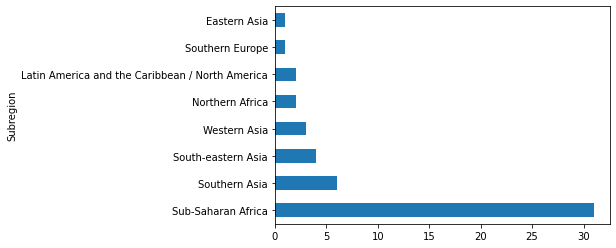

In [2339]:
plt.title('')
df.sort_values('Avg. Annual Growth', ascending = False).head(50).value_counts('Subregion').plot(kind = 'barh')
plt.show()

In [2340]:
df[df['Avg. Annual Growth'] < 0]

,Country,HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
91,Lebanon,74.4,-0.32,Western Asia,Western Asia,Asia
101,Jordan,72.9,-0.12,Western Asia,Western Asia,Asia
104,Libya,72.4,-1.08,Northern Africa,Northern Africa,Africa
112,Venezuela,71.1,-0.69,South America,Latin America and the Caribbean,Americas
140,East Timor,60.6,-0.40,South-eastern Asia,South-eastern Asia,Asia
151,Syria,56.7,-1.87,Western Asia,Western Asia,Asia
178,Yemen,47.0,-0.82,Western Asia,Western Asia,Asia


In [2341]:
#Countries with a negative HDI growth rate
df[df['Avg. Annual Growth'] < 0].value_counts("Sub-Subregion")

Sub-Subregion
Western Asia          4
South-eastern Asia    1
South America         1
Northern Africa       1
dtype: int64

In [2342]:
df['HDI (2020 Report)'].groupby(df['Region']).agg(['mean']).sort_values('mean',ascending = False)

,mean
Region,
Europe,87.970732
Americas,75.842857
Asia,74.243750
Oceania,71.408333
Africa,56.721569


''

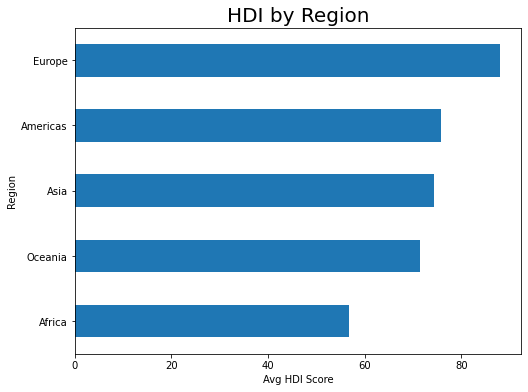

In [2343]:
plt.figure(figsize = (8,6))
plt.title('HDI by Region', size = 20)
plt.xlabel("Avg HDI Score")
df["HDI (2020 Report)"].groupby(df['Region']).mean().sort_values(ascending = True).plot(kind = 'barh')
;

In [2344]:
df['HDI (2020 Report)'].groupby(df["Sub-Subregion"]).mean().sort_values(ascending = False)

Sub-Subregion
Australia and New Zealand                          93.750000
Western Europe                                     92.937500
Northern America                                   92.750000
Northern Europe                                    92.560000
Eastern Asia                                       85.640000
Southern Europe                                    85.100000
Eastern Europe                                     83.140000
Latin America and the Caribbean / North America    81.400000
Western Asia                                       77.361111
South America                                      76.316667
Caribbean                                          74.733333
Central Asia                                       72.500000
Polynesia                                          72.000000
Central America                                    71.875000
South-eastern Asia                                 71.809091
Micronesia                                         69.500000
Northern A

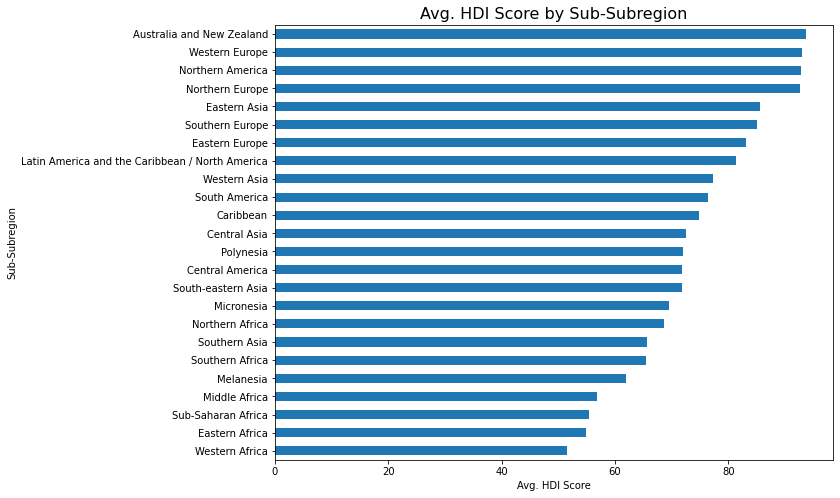

In [2345]:
plt.figure(figsize = (10,8))
plt.title('Avg. HDI Score by Sub-Subregion', size = 16)
df['HDI (2020 Report)'].groupby(df['Sub-Subregion']).mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Avg. HDI Score');

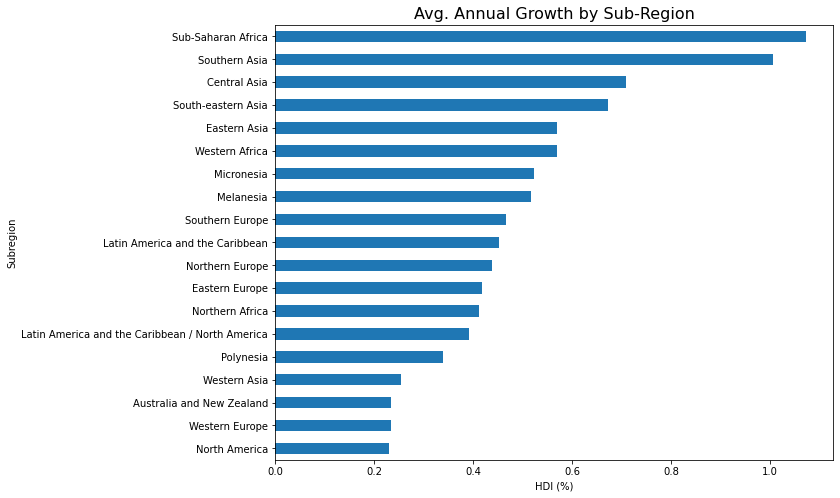

In [2346]:
plt.figure(figsize = (10,8))
plt.title('Avg. Annual Growth by Sub-Region', size = 16)
df['Avg. Annual Growth'].groupby(df.Subregion).mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('HDI (%)');

In [2347]:
df[df['Region'] == 'Oceania'].sort_values('HDI (2020 Report)', ascending = False)

,Country,HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
7,Australia,94.4,0.17,Australia and New Zealand,Australia and New Zealand,Oceania
14,New Zealand,93.1,0.30,Australia and New Zealand,Australia and New Zealand,Oceania
49,Palau,82.6,0.55,Micronesia,Micronesia,Oceania
92,Fiji,74.3,0.43,Melanesia,Melanesia,Oceania
103,Tonga,72.5,0.41,Polynesia,Polynesia,Oceania
110,Samoa,71.5,0.27,Polynesia,Polynesia,Oceania
116,Marshall Islands,70.4,NaN,Micronesia,Micronesia,Oceania
133,Kiribati,63.0,0.67,Micronesia,Micronesia,Oceania
135,Federated States of Micronesia,62.0,0.35,Micronesia,Micronesia,Oceania
139,Vanuatu,60.9,0.35,Melanesia,Melanesia,Oceania


## United Nations geoscheme

Statistical regions as defined by the UNSD. Antarctica is not shown.
The United Nations geoscheme is a system which divides the 249 countries and territories of the world into 6 regional and 22 subregional groups. It was devised by the United Nations Statistics Division (UNSD) based on the M49 coding classification.

## Scrape GDP Data/Merge/Correlation

Scrape GDP per Capita data from wikipedia. Replace null values with values from other organization. If there is no UN data take estimated value from IMF or CIA world factbook.

In [2348]:
url_gdp = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

In [2349]:
webscraper(url_gdp)

Column Headers: ['Country/Territory', 'Subregion', 'Region', 'IMF[4]', 'United Nations[5]', 'World Bank[6]']


,0,1,2,3,4,5,6,7,8
0,Monaco *,Western Europe,Europe,N/A,190532,2019,190513,2019,None
1,Liechtenstein *,Western Europe,Europe,N/A,179258,2019,180367,2018,None
2,Luxembourg *,Western Europe,Europe,131782,2021,115481,2019,115874,2020
3,Bermuda *,Northern America,Americas,N/A,117768,2019,117098,2019,None
4,Switzerland *,Western Europe,Europe,94696,2021,85135,2019,86602,2020
...,...,...,...,...,...,...,...,...,...
210,Malawi *,Eastern Africa,Africa,432,2021,435,2019,625,2020
211,Mozambique *,Eastern Africa,Africa,425,2021,504,2019,449,2020
212,Somalia *,Eastern Africa,Africa,347,2021,105,2019,309,2020
213,South Sudan *,Eastern Africa,Africa,315,2021,448,2019,1120,2015


In [2350]:
#call function and get print out of column headers (due to multiple column headers the incorrect number of column 
#headers is printed. Must use original webscraper function and relabel column headers later.)
df_gdp = webscraper(url_gdp)

Column Headers: ['Country/Territory', 'Subregion', 'Region', 'IMF[4]', 'United Nations[5]', 'World Bank[6]']


In [2351]:
df_gdp.head(2)

,0,1,2,3,4,5,6,7,8
0,Monaco *,Western Europe,Europe,N/A,190532,2019,190513,2019,None
1,Liechtenstein *,Western Europe,Europe,N/A,179258,2019,180367,2018,None


In [2352]:
#There a three seperate estimates for GDP per Capita by the UN, IMF and World Bank. N/A's from the IMF column will
#be replaced with the UN data if available and if not the World Bank estimate will be used. This allows for every 
#country in our data set to have a value for GDP per Capita. 

df_gdp[df_gdp[3] == 'N/A']

,0,1,2,3,4,5,6,7,8
0,Monaco *,Western Europe,Europe,N/A,190532,2019,190513,2019,None
1,Liechtenstein *,Western Europe,Europe,N/A,179258,2019,180367,2018,None
3,Bermuda *,Northern America,Americas,N/A,117768,2019,117098,2019,None
6,Cayman Islands *,Caribbean,Americas,N/A,92692,2019,91393,2019,None
19,Greenland *,Northern America,Americas,N/A,53353,2019,54471,2018,None
25,British Virgin Islands *,Caribbean,Americas,N/A,48511,2019,N/A,None,None
31,Andorra *,Southern Europe,Europe,N/A,40887,2019,40897,2019,None
32,Guam *,Micronesia,Oceania,N/A,N/A,37724,2019,None,None
35,New Caledonia *,Melanesia,Oceania,N/A,34942,2019,12580,2000,None
41,Turks and Caicos Islands,Caribbean,Americas,N/A,31353,2019,23880,2020,None


In [2353]:
df_gdp.replace('N/A', np.nan, inplace = True)

In [2354]:
#If column 3 (IMF) has nan as a value replace it with the value form column 4 (UN).
df_gdp[3] = df_gdp[4].where(df_gdp[3].isna(),df_gdp[3])

In [2355]:
df_gdp[3] = df_gdp[5].where(df_gdp[3].isna(),df_gdp[3])

In [2356]:
df_gdp.drop(columns = [1,2,4,5,6,7,8], inplace = True)

In [2357]:
df_gdp.rename(columns = {0:'Country', 3:'GDP per Capita'}, inplace = True)

In [2358]:
df_gdp['Country'] = df_gdp['Country'].apply(lambda x: x.replace('*', '').rstrip())

In [2359]:
df_gdp['GDP per Capita'][166] = '2138' 

In [2360]:
df = pd.merge(df,df_gdp, on = 'Country', how = 'inner')

In [2361]:
df

,Country,HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region,GDP per Capita
0,Norway,95.7,0.20,Northern Europe,Northern Europe,Europe,81995
1,Switzerland,95.5,0.16,Western Europe,Western Europe,Europe,94696
2,Hong Kong,94.9,0.54,Eastern Asia,Eastern Asia,Asia,49036
3,Iceland,94.9,0.62,Northern Europe,Northern Europe,Europe,65273
4,Germany,94.7,0.24,Western Europe,Western Europe,Europe,51860
...,...,...,...,...,...,...,...
173,Sierra Leone,45.2,1.40,Western Africa,Sub-Saharan Africa,Africa,542
174,Mali,43.4,0.69,Western Africa,Sub-Saharan Africa,Africa,983
175,Burundi,43.3,0.58,Eastern Africa,Sub-Saharan Africa,Africa,265
176,South Sudan,43.3,0.61,Eastern Africa,Sub-Saharan Africa,Africa,315


In [2362]:
df['GDP per Capita'] = df['GDP per Capita'].astype(int)

In [2363]:
df.dtypes

Country                object
HDI (2020 Report)     float64
Avg. Annual Growth    float64
Sub-Subregion          object
Subregion              object
Region                 object
GDP per Capita          int64
dtype: object

In [2364]:
round(df['GDP per Capita'].groupby(df['Sub-Subregion']).mean().sort_values(ascending = False),2)

Sub-Subregion
Western Europe               83069.50
Northern America             58765.50
Australia and New Zealand    55111.00
Northern Europe              49256.33
Eastern Asia                 28564.20
Southern Europe              20364.08
Western Asia                 18353.19
Eastern Europe               13531.80
South-eastern Asia           12306.18
Caribbean                     9810.00
South America                 7419.42
Central America               6455.62
Micronesia                    6324.33
Southern Africa               4702.50
Central Asia                  4513.60
Polynesia                     4376.50
Middle Africa                 4229.00
Southern Asia                 3839.89
Melanesia                     3304.50
Sub-Saharan Africa            3138.50
Northern Africa               3116.33
Eastern Africa                2068.12
Western Africa                1515.08
Name: GDP per Capita, dtype: float64

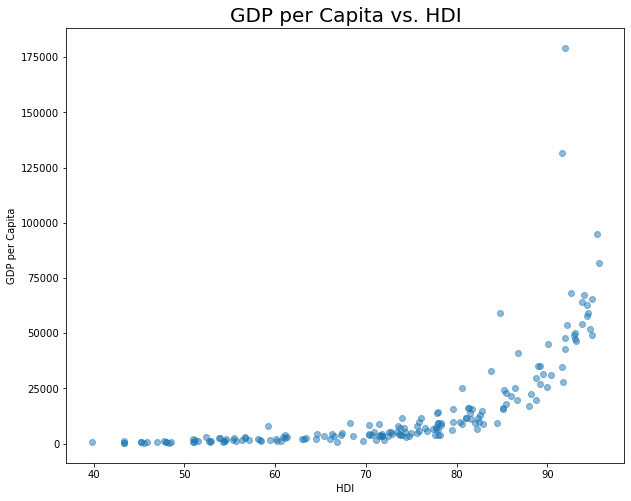

In [2365]:
plt.figure(figsize = (10,8))
plt.title('GDP per Capita vs. HDI', size = 20)
plt.scatter(df['HDI (2020 Report)'], df['GDP per Capita'], alpha=0.5)
plt.ylabel('GDP per Capita')
plt.xlabel('HDI')
plt.show()

In [2366]:
print(f"The correlation of GDP per Capita & HDI is {df['HDI (2020 Report)'].corr(df['GDP per Capita'])*100}")

The correlation of GDP per Capita & HDI is 65.65495142536228


In [2367]:
m, b = np.polyfit(df['HDI (2020 Report)'], df['GDP per Capita'], 1)

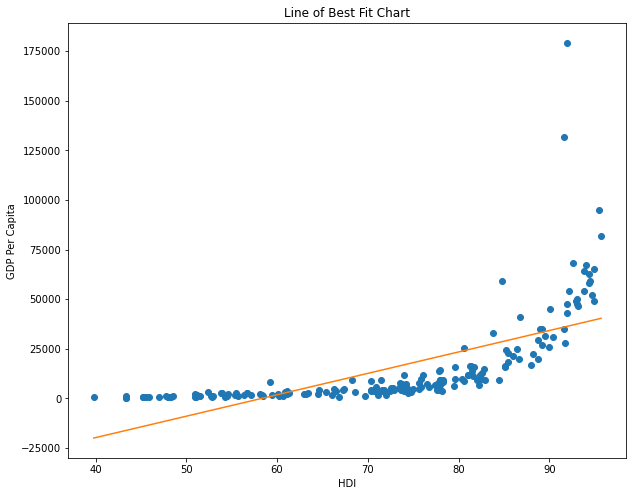

In [2368]:
plt.figure(figsize = (10,8))
plt.title('Line of Best Fit Chart')
plt.xlabel('HDI')
plt.ylabel('GDP Per Capita')
plt.plot(df['HDI (2020 Report)'], df['GDP per Capita'], 'o')
#create scatter plot
plt.plot(df['HDI (2020 Report)'], m*df['HDI (2020 Report)'] + b);

In [2369]:
correl = df['HDI (2020 Report)'], m*df['HDI (2020 Report)'] + b

In [2370]:
def line_bfit(x, y):
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    std_y = np.std(y)
    std_x = np.std(x)
    r_xy = np.corrcoef(x, y)[0][1]
    # Calculate the betas.
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - beta_1 * x_bar
    return beta_0 + beta_1 * x

In [2379]:
df['L_Yhat'] = line_of_best_fit(df['HDI (2020 Report)'], df['GDP per Capita'])

In [2380]:
df

,Country,HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region,GDP per Capita,L_Yhat
0,Norway,95.7,0.20,Northern Europe,Northern Europe,Europe,81995,40313.361253
1,Switzerland,95.5,0.16,Western Europe,Western Europe,Europe,94696,40097.447072
2,Hong Kong,94.9,0.54,Eastern Asia,Eastern Asia,Asia,49036,39449.704531
3,Iceland,94.9,0.62,Northern Europe,Northern Europe,Europe,65273,39449.704531
4,Germany,94.7,0.24,Western Europe,Western Europe,Europe,51860,39233.790350
...,...,...,...,...,...,...,...,...
173,Sierra Leone,45.2,1.40,Western Africa,Sub-Saharan Africa,Africa,542,-14204.969328
174,Mali,43.4,0.69,Western Africa,Sub-Saharan Africa,Africa,983,-16148.196952
175,Burundi,43.3,0.58,Eastern Africa,Sub-Saharan Africa,Africa,265,-16256.154043
176,South Sudan,43.3,0.61,Eastern Africa,Sub-Saharan Africa,Africa,315,-16256.154043


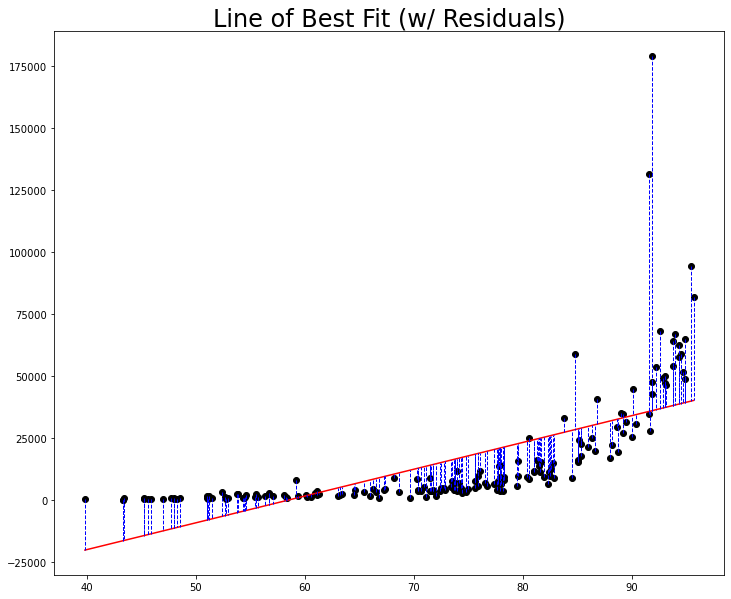

In [2386]:
plt.figure(figsize = (12,10))

plt.scatter(df['HDI (2020 Report)'],
            df['GDP per Capita'],
            color='black')

# Also generate a line for predictions.
plt.plot(df['HDI (2020 Report)'],
         df['L_Yhat'],
         color='red')

# Iterate over our DataFrame, plotting a dashed line 
# from each observed value to its predicted value.
# Code originally written by Marc Harper.
for i, row in df.iterrows():
    plt.plot((row['HDI (2020 Report)'], row['HDI (2020 Report)']),
             (row['GDP per Capita'], row['L_Yhat']),
             color = 'blue',
             linestyle = '--',
             lw=1)
    

plt.title('Line of Best Fit (w/ Residuals)', fontsize = 24);

In [2389]:
def rmse(y_true, y_pred): 
    '''Returns the root mean squared error'''
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [2390]:
rmse(df['GDP per Capita'], df['L_Yhat'])

18062.584739167432

In [2395]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['HDI (2020 Report)'], df['GDP per Capita'])
print(slope)

1079.570902579129


In [2371]:
line_bfit(df['HDI (2020 Report)'], df['HDI (2020 Report)'])

0      95.7
1      95.5
2      94.9
3      94.9
4      94.7
       ... 
173    45.2
174    43.4
175    43.3
176    43.3
177    39.8
Name: HDI (2020 Report), Length: 178, dtype: float64

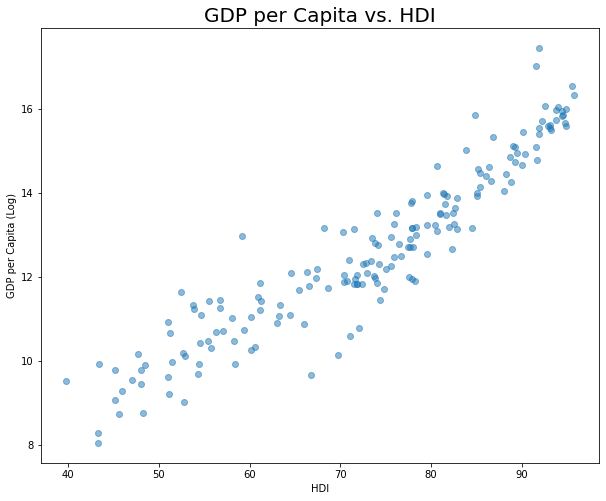

In [2372]:
plt.figure(figsize = (10,8))
plt.title('GDP per Capita vs. HDI', size = 20)
plt.scatter(df['HDI (2020 Report)'], np.log2(df['GDP per Capita']), alpha=0.5)
plt.ylabel('GDP per Capita (Log)')
plt.xlabel('HDI')
plt.show()

In [2373]:
df['HDI (2020 Report)'].corr(np.log2(df['GDP per Capita']))

0.9353998525333853

In [2374]:
import string
import random
characters = list(string.ascii_letters + string.digits + "!@#$%^&*()")

def generate_random_password():
	## length of password from the user
	length = int(input("Enter password length: "))

	## shuffling the characters
	random.shuffle(characters)
	
	## picking random characters from the list
	password = []
	for i in range(length):
		password.append(random.choice(characters))

	## shuffling the resultant password
	random.shuffle(password)

	## converting the list to string
	## printing the list
	print("".join(password))



## invoking the function
generate_random_password()

Enter password length: 12
f9Nw$gGrjfW4
